In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from datetime import datetime

sns.set()

%matplotlib inline

In [33]:
params = {
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
    "figure.figsize": (14, 5),
}

plt.rcParams.update(params)

In [73]:
df_raw = pd.concat(map(
    pd.read_csv,
    [
        "https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2020-01.csv",
        "https://ecobici.cdmx.gob.mx/wp-content/uploads/2022/08/2020-02.csv"
    ]
))

# rename columns to english
df_raw.columns = ["User_gender", "User_age", "Bicycle", "Borrow_dock", "Borrow_date", "Borrow_time", "Return_dock", "Return_date", "Return_time"]
df_raw.head(5)

,User_gender,User_age,Bicycle,Borrow_dock,Borrow_date,Borrow_time,Return_dock,Return_date,Return_time
0,F,33,8744,52,01/01/2020,0:05:06,3,01/01/2020,0:13:00
1,M,30,7865,31,01/01/2020,0:09:50,271,01/01/2020,0:21:30
2,F,36,7819,251,01/01/2020,0:13:25,150,01/01/2020,0:26:10
3,F,33,11258,3,01/01/2020,0:15:22,1,01/01/2020,0:25:29
4,M,29,7722,136,01/01/2020,0:18:42,63,01/01/2020,0:24:01


In [74]:
def parse_dt(dt, format_string="%d/%m/%Y %H:%M:%S"):
    return datetime.strptime(dt, format_string)


def convert_dates(dataframe):
    dataframe["Borrow_datetime"] = (dataframe["Borrow_date"] + " " + dataframe["Borrow_time"]).apply(lambda r: parse_dt(r))
    dataframe["Return_datetime"] = (dataframe["Return_date"] + " " + dataframe["Return_time"]).apply(lambda r: parse_dt(r))
    return dataframe
    

In [75]:
df = convert_dates(df_raw)
df = df[["User_gender", "User_age", "Bicycle", "Borrow_dock", "Borrow_datetime", "Return_dock", "Return_datetime"]]

# index the df with datetime
df.index = df["Borrow_datetime"]

# select only jan and feb
df = pd.concat([df.loc["2020-01"], df.loc["2020-02"]])

df.head()

,User_gender,User_age,Bicycle,Borrow_dock,Borrow_datetime,Return_dock,Return_datetime
Borrow_datetime,,,,,,,
2020-01-01 00:05:06,F,33,8744,52,2020-01-01 00:05:06,3,2020-01-01 00:13:00
2020-01-01 00:09:50,M,30,7865,31,2020-01-01 00:09:50,271,2020-01-01 00:21:30
2020-01-01 00:13:25,F,36,7819,251,2020-01-01 00:13:25,150,2020-01-01 00:26:10
2020-01-01 00:15:22,F,33,11258,3,2020-01-01 00:15:22,1,2020-01-01 00:25:29
2020-01-01 00:18:42,M,29,7722,136,2020-01-01 00:18:42,63,2020-01-01 00:24:01


In [76]:
df_jan = df.loc["2020-01"]

In [77]:
df_jan.loc["2020-01-14"]

,User_gender,User_age,Bicycle,Borrow_dock,Borrow_datetime,Return_dock,Return_datetime
Borrow_datetime,,,,,,,
2020-01-14 00:00:18,M,32,6866,15,2020-01-14 00:00:18,127,2020-01-14 00:08:37
2020-01-14 00:00:59,M,24,4238,131,2020-01-14 00:00:59,122,2020-01-14 00:09:26
2020-01-14 00:01:01,M,52,12377,133,2020-01-14 00:01:01,136,2020-01-14 00:06:20
2020-01-14 00:01:14,M,38,9652,64,2020-01-14 00:01:14,37,2020-01-14 00:05:58
2020-01-14 00:01:55,M,30,4162,81,2020-01-14 00:01:55,171,2020-01-14 00:07:56
...,...,...,...,...,...,...,...
2020-01-14 23:58:01,M,22,8260,115,2020-01-14 23:58:01,269,2020-01-15 00:16:51
2020-01-14 08:43:49,M,46,12346,154,2020-01-14 08:43:49,141,2020-01-16 09:15:07
2020-01-14 09:03:14,M,43,10440,22,2020-01-14 09:03:14,36,2020-01-17 03:48:36


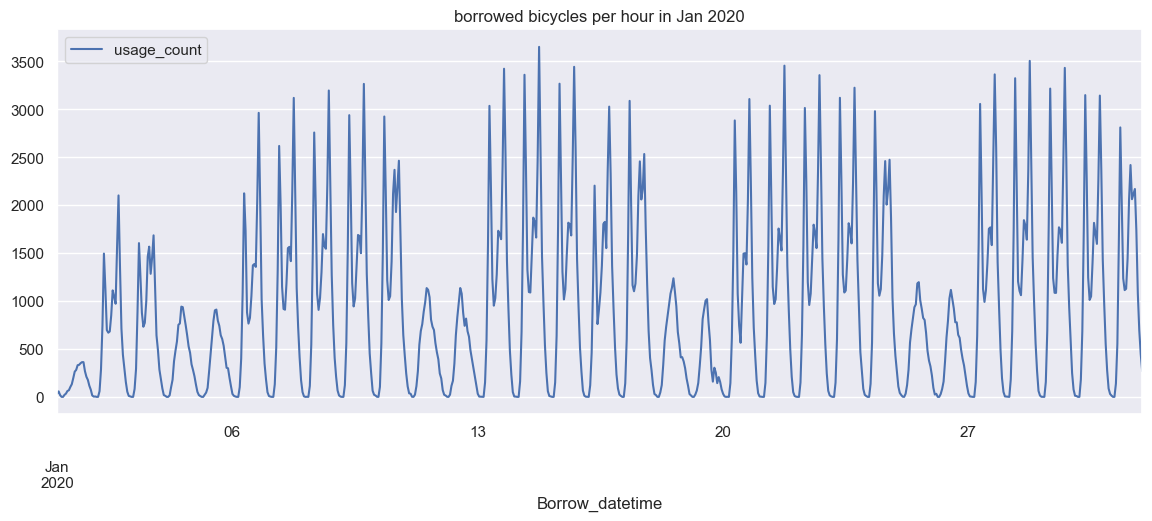

In [78]:
df_hour = pd.DataFrame(df_jan["Bicycle"].resample("H").count().rename("usage_count"))

df_hour.plot(title="borrowed bicycles per hour in Jan 2020")
plt.show()

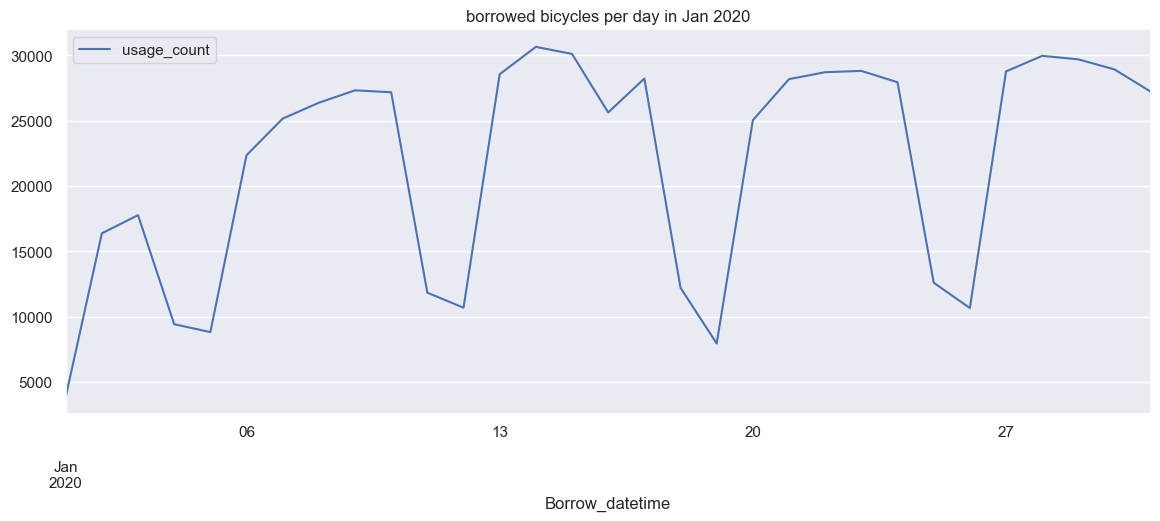

In [79]:
df_day = pd.DataFrame(df_jan["Bicycle"].resample("D").count().rename("usage_count"))

df_day.plot(title="borrowed bicycles per day in Jan 2020")
plt.show()

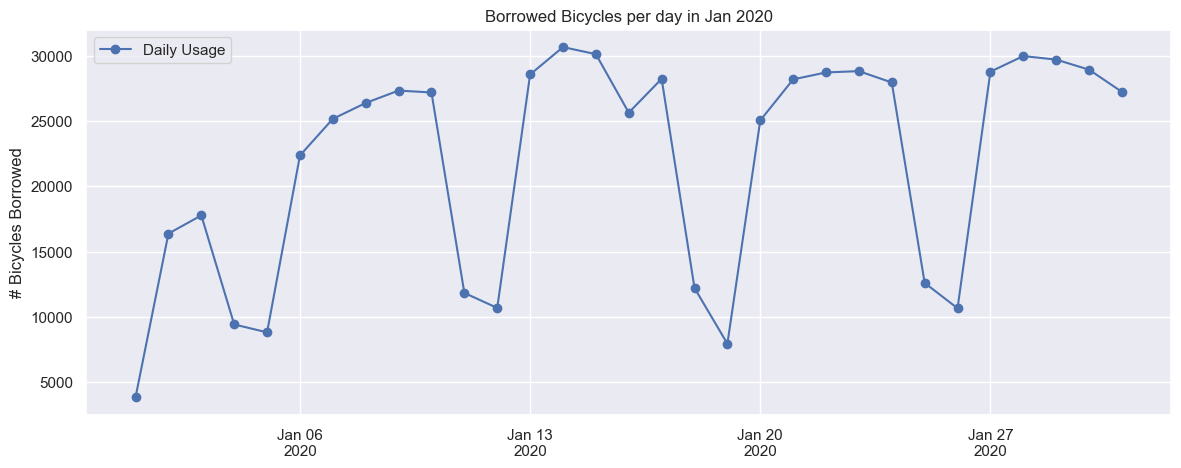

In [80]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

ax.plot(df_day["usage_count"], marker="o", linestyle="-", label="Daily Usage")
ax.set_ylabel("# Bicycles Borrowed")
ax.set_title("Borrowed Bicycles per day in Jan 2020")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d\n%Y"))
ax.legend()
plt.show()

In [81]:
df_jan_feb_day = pd.DataFrame(df["Bicycle"].resample("D").count().rename("usage_count"))

df_jan_feb_day.head()

,usage_count
Borrow_datetime,
2020-01-01,3854
2020-01-02,16374
2020-01-03,17766
2020-01-04,9417
2020-01-05,8812


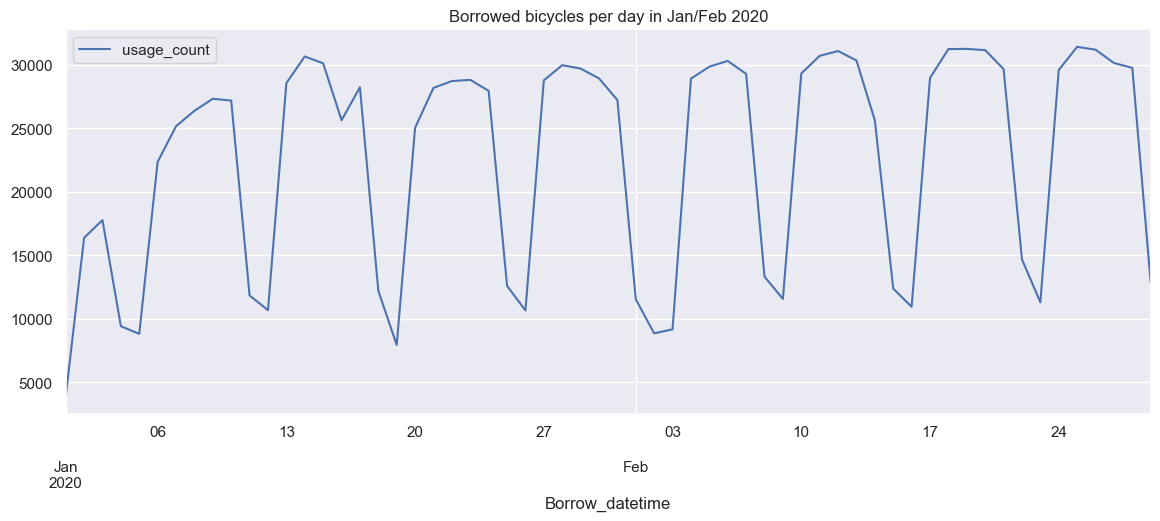

In [82]:
df_jan_feb_day.plot(title="Borrowed bicycles per day in Jan/Feb 2020")
plt.show()

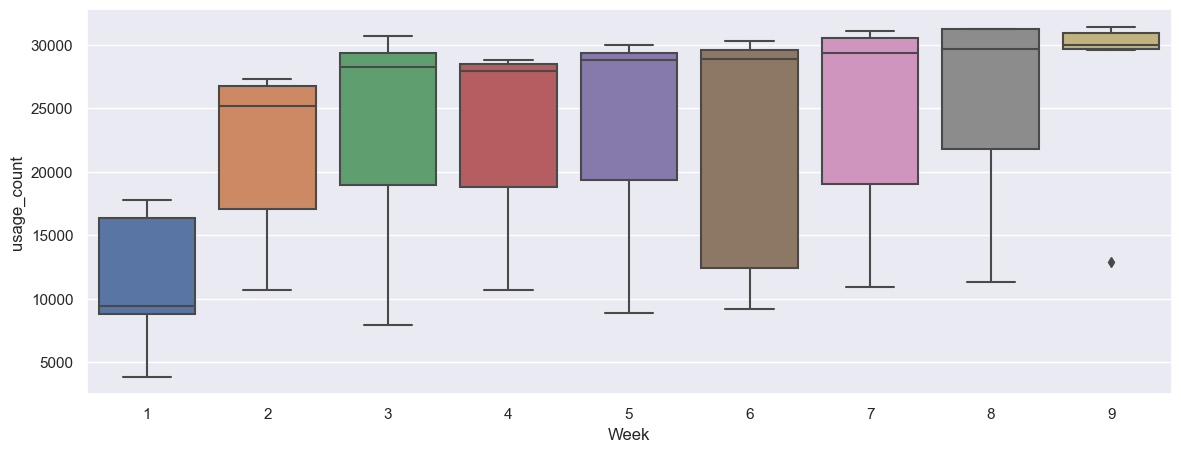

In [87]:
df_jan_feb_day["Year"] = df_jan_feb_day.index.year
df_jan_feb_day["Month"] = df_jan_feb_day.index.month
df_jan_feb_day["Week"] = df_jan_feb_day.index.isocalendar().week
df_jan_feb_day["Weekday"] = df_jan_feb_day.index.dayofweek
df_jan_feb_day["Weekday Name"] = df_jan_feb_day.index.day_name()

sns.boxplot(data=df_jan_feb_day, x="Week", y="usage_count")
plt.show()

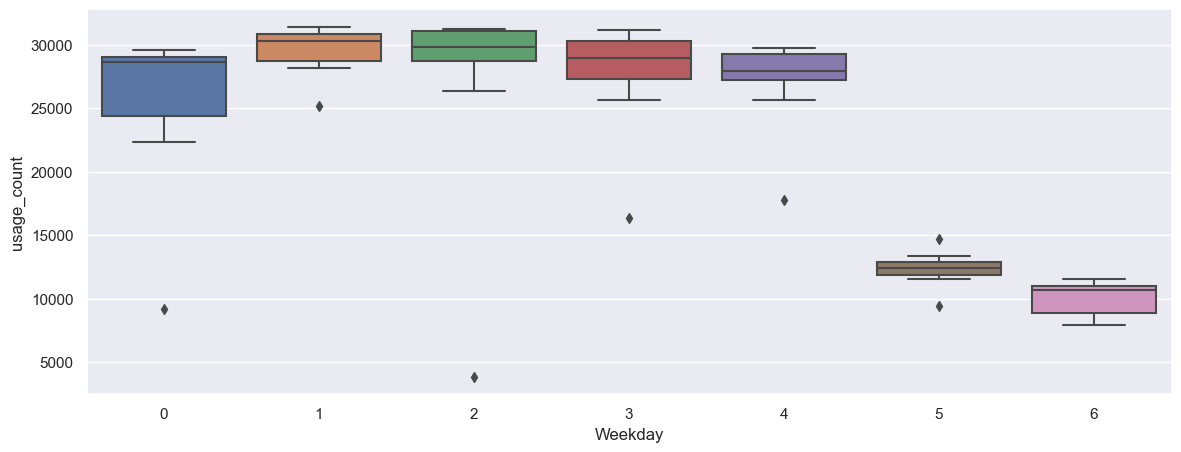

In [88]:
sns.boxplot(data=df_jan_feb_day, x="Weekday", y="usage_count")
plt.show()

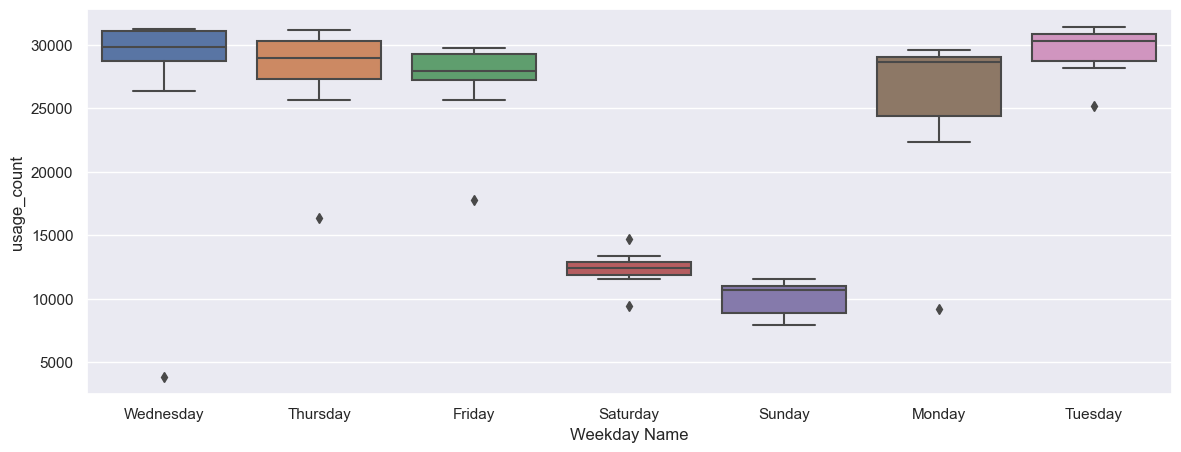

In [89]:
sns.boxplot(data=df_jan_feb_day, x="Weekday Name", y="usage_count")
plt.show()

In [91]:
dfp = df_jan_feb_day.pivot(index="Weekday", columns="Week", values="usage_count")
dfp

Week,1,2,3,4,5,6,7,8,9
Weekday,,,,,,,,,
0,NaN,22354.0,28554.0,25035.0,28770.0,9171.0,29307.0,28956.0,29588.0
1,NaN,25157.0,30650.0,28180.0,29963.0,28903.0,30699.0,31230.0,31405.0
2,3854.0,26373.0,30110.0,28711.0,29695.0,29850.0,31079.0,31247.0,31184.0
3,16374.0,27323.0,25631.0,28810.0,28922.0,30298.0,30335.0,31148.0,30138.0
4,17766.0,27176.0,28223.0,27941.0,27222.0,29279.0,25616.0,29658.0,29749.0
5,9417.0,11829.0,12205.0,12596.0,11535.0,13320.0,12376.0,14678.0,12860.0
6,8812.0,10681.0,7941.0,10655.0,8851.0,11566.0,10944.0,11298.0,NaN


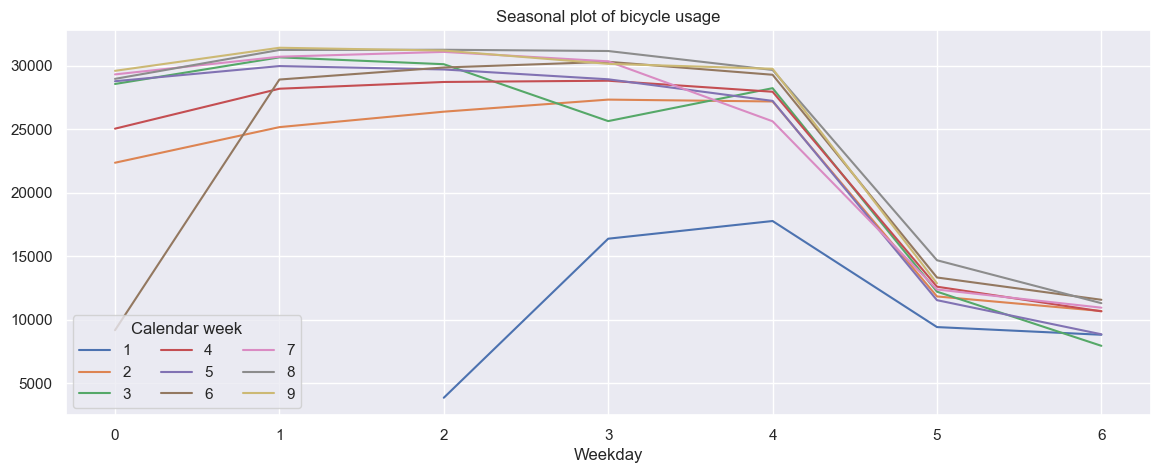

In [93]:
# all the weeks in a year, for every day of the week the count is teh same across the year
dfp.plot(title="Seasonal plot of bicycle usage")
plt.legend(title="Calendar week", loc="lower left", ncol=3)
plt.show()

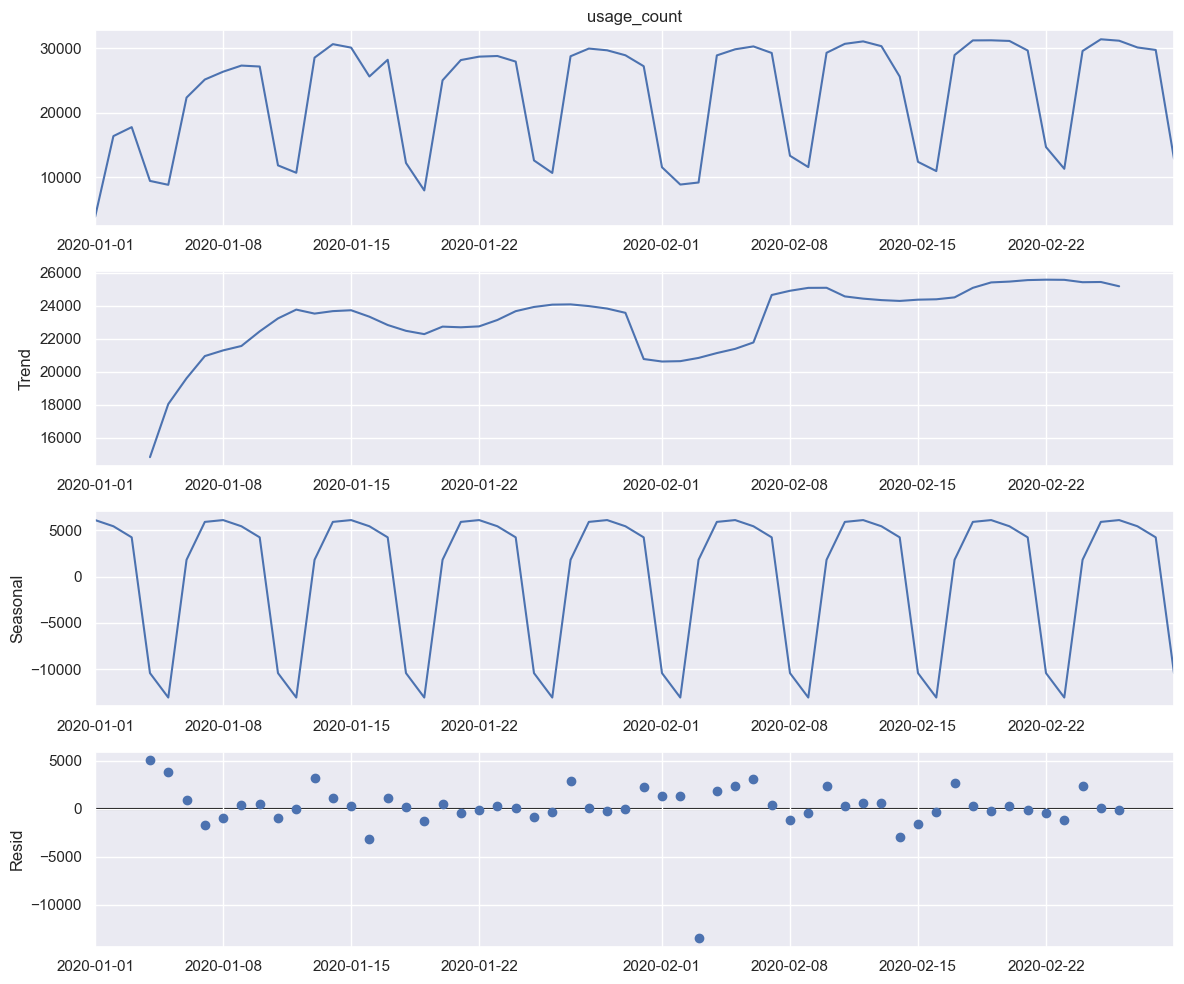

In [95]:
plt.rcParams["figure.figsize"] = (12, 10)
decompose = sm.tsa.seasonal_decompose(df_jan_feb_day["usage_count"], model="additive", period=7)
decompose.plot()
plt.show()